In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from math import sqrt
import numpy as np

In [2]:
dt=pd.read_csv(r"C:\Users\KIIT\Desktop\Python Intro and Stats\Probability and Stats\diabetes.csv")
dt.head(25)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
dt.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [4]:
dt.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#Maximum values of the columns
dt.max()

Pregnancies                  17.00
Glucose                     199.00
BloodPressure               122.00
SkinThickness                99.00
Insulin                     846.00
BMI                          67.10
DiabetesPedigreeFunction      2.42
Age                          81.00
Outcome                       1.00
dtype: float64

Checking null values in the dataset

In [7]:
dt.isin([0]).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

We know that the Glucose, SkinThickness, Insulin, Blood Pressure, BMI cannot have 0 value so we will preprocess the data.

In [8]:
dt['Glucose'].value_counts()

99     17
100    17
129    14
125    14
106    14
       ..
169     1
61      1
178     1
177     1
199     1
Name: Glucose, Length: 136, dtype: int64

In [9]:
dt['Glucose'] = dt['Glucose'].replace(0, np.nan)
dt['Glucose'].fillna(dt['Glucose'].mean(), inplace=True)

In [10]:
dt['SkinThickness'].value_counts()

0     227
32     31
30     27
27     23
23     22
18     20
28     20
33     20
31     19
19     18
39     18
29     17
40     16
37     16
22     16
25     16
26     16
41     15
35     15
36     14
15     14
17     14
20     13
24     12
13     11
42     11
21     10
46      8
34      8
12      7
38      7
11      6
45      6
16      6
14      6
43      6
44      5
10      5
47      4
48      4
49      3
50      3
54      2
52      2
8       2
7       2
51      1
56      1
60      1
63      1
99      1
Name: SkinThickness, dtype: int64

In [11]:
dt['SkinThickness'] = dt['SkinThickness'].replace(0, np.nan)
dt['SkinThickness'].fillna(dt['SkinThickness'].mean(), inplace=True)

In [12]:
dt['SkinThickness'].value_counts()

29.15342    227
32.00000     31
30.00000     27
27.00000     23
23.00000     22
18.00000     20
28.00000     20
33.00000     20
31.00000     19
39.00000     18
19.00000     18
29.00000     17
26.00000     16
25.00000     16
22.00000     16
40.00000     16
37.00000     16
41.00000     15
35.00000     15
15.00000     14
36.00000     14
17.00000     14
20.00000     13
24.00000     12
13.00000     11
42.00000     11
21.00000     10
34.00000      8
46.00000      8
12.00000      7
38.00000      7
14.00000      6
43.00000      6
11.00000      6
45.00000      6
16.00000      6
10.00000      5
44.00000      5
48.00000      4
47.00000      4
49.00000      3
50.00000      3
7.00000       2
52.00000      2
8.00000       2
54.00000      2
63.00000      1
51.00000      1
99.00000      1
60.00000      1
56.00000      1
Name: SkinThickness, dtype: int64

In [13]:
dt['BloodPressure'].value_counts()

70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
82     30
66     30
88     25
84     23
90     22
58     21
86     21
50     13
56     12
54     11
52     11
92      8
75      8
65      7
85      6
94      6
48      5
96      4
44      4
110     3
106     3
100     3
98      3
108     2
104     2
46      2
55      2
30      2
95      1
61      1
102     1
38      1
40      1
24      1
114     1
122     1
Name: BloodPressure, dtype: int64

In [14]:
dt['BloodPressure'] = dt['BloodPressure'].replace(0, np.nan)
dt['BloodPressure'].fillna(dt['BloodPressure'].mean(), inplace=True)

In [15]:
dt['Insulin'].value_counts()

0      374
105     11
140      9
130      9
120      8
      ... 
193      1
191      1
188      1
184      1
846      1
Name: Insulin, Length: 186, dtype: int64

In [16]:
dt['Insulin'] = dt['Insulin'].replace(0, np.nan)
dt['Insulin'].fillna(dt['Insulin'].mean(), inplace=True)

In [17]:
dt['BMI'].value_counts()

32.0    13
31.2    12
31.6    12
0.0     11
33.3    10
        ..
19.3     1
49.3     1
19.4     1
20.0     1
40.1     1
Name: BMI, Length: 248, dtype: int64

In [18]:
dt['BMI'] = dt['BMI'].replace(0, np.nan)
dt['BMI'].fillna(dt['BMI'].mean(), inplace=True)

# Visualizing the data

(array([246., 178., 125.,  50.,  83.,  52.,  11.,  19.,   3.,   1.]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <BarContainer object of 10 artists>)

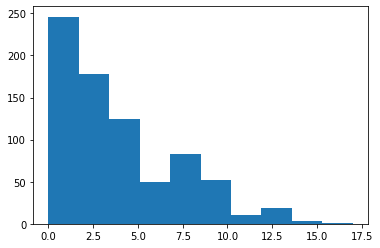

In [19]:
plt.hist(dt['Pregnancies'],bins=10)


(array([  4.,  19.,  87., 149., 161., 130.,  88.,  54.,  44.,  32.]),
 array([ 44. ,  59.5,  75. ,  90.5, 106. , 121.5, 137. , 152.5, 168. ,
        183.5, 199. ]),
 <BarContainer object of 10 artists>)

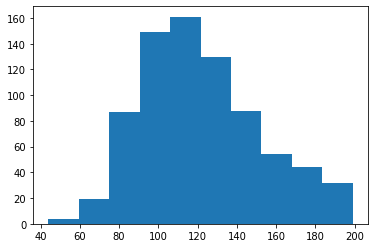

In [20]:

plt.hist(dt['Glucose'])

(array([ 52., 161., 207., 193.,  91.,  48.,  10.,   4.,   1.,   1.]),
 array([18.2 , 23.09, 27.98, 32.87, 37.76, 42.65, 47.54, 52.43, 57.32,
        62.21, 67.1 ]),
 <BarContainer object of 10 artists>)

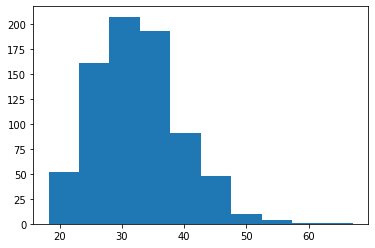

In [21]:
plt.hist(dt['BMI'],bins=10)

(array([142., 517.,  55.,  29.,   7.,  10.,   4.,   1.,   2.,   1.]),
 array([ 14. ,  97.2, 180.4, 263.6, 346.8, 430. , 513.2, 596.4, 679.6,
        762.8, 846. ]),
 <BarContainer object of 10 artists>)

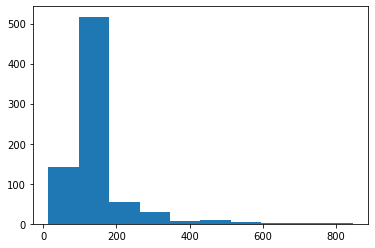

In [22]:
plt.hist(dt['Insulin'])

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

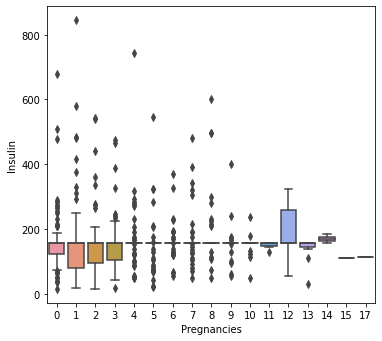

In [23]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'Pregnancies', y = 'Insulin',data = dt)

(array([318., 206., 136.,  58.,  25.,  15.,   3.,   3.,   1.,   3.]),
 array([0.078 , 0.3122, 0.5464, 0.7806, 1.0148, 1.249 , 1.4832, 1.7174,
        1.9516, 2.1858, 2.42  ]),
 <BarContainer object of 10 artists>)

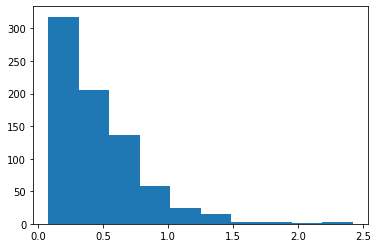

In [24]:
plt.hist(dt['DiabetesPedigreeFunction'])


(array([300., 157.,  92.,  86.,  52.,  34.,  26.,  16.,   4.,   1.]),
 array([21., 27., 33., 39., 45., 51., 57., 63., 69., 75., 81.]),
 <BarContainer object of 10 artists>)

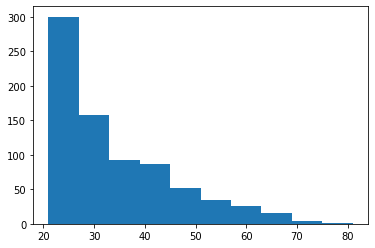

In [25]:
plt.hist(dt['Age'])

Text(0, 0.5, 'glucose')

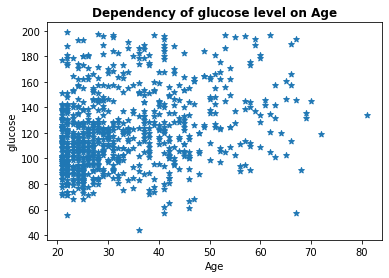

In [26]:
plt.scatter(dt['Age'],dt['Glucose'],marker='*')

plt.title("Dependency of glucose level on Age",fontweight="bold")
plt.xlabel("Age")
plt.ylabel("glucose")

Text(0, 0.5, 'DiabetesPedigreeFunction')

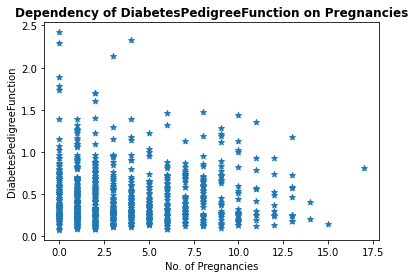

In [27]:
plt.scatter(dt['Pregnancies'],dt['DiabetesPedigreeFunction'],marker='*')
plt.title("Dependency of DiabetesPedigreeFunction on Pregnancies",fontweight="bold")
plt.xlabel("No. of Pregnancies")
plt.ylabel("DiabetesPedigreeFunction")

Text(0, 0.5, 'DiabetesPedigreeFunction')

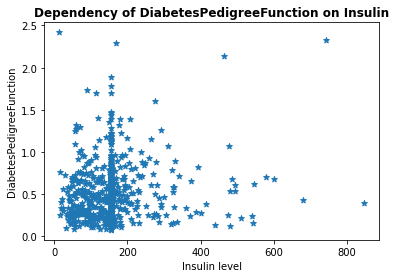

In [28]:
plt.scatter(dt['Insulin'],dt['DiabetesPedigreeFunction'],marker='*')
plt.title("Dependency of DiabetesPedigreeFunction on Insulin",fontweight="bold")
plt.xlabel("Insulin level")
plt.ylabel("DiabetesPedigreeFunction")

Text(0, 0.5, 'BloodPressure')

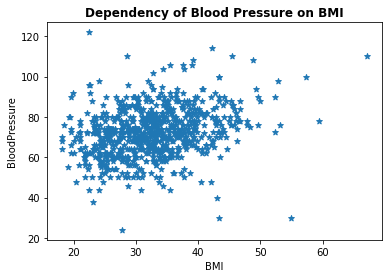

In [29]:
plt.scatter(dt['BMI'],dt['BloodPressure'],marker='*')
plt.title("Dependency of Blood Pressure on BMI",fontweight="bold")
plt.xlabel("BMI")
plt.ylabel("BloodPressure")

Text(0, 0.5, 'Skin Thickness')

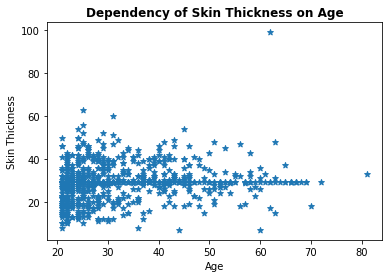

In [30]:
plt.scatter(dt['Age'],dt['SkinThickness'],marker='*')
plt.title("Dependency of Skin Thickness on Age",fontweight="bold")
plt.xlabel("Age")
plt.ylabel("Skin Thickness")

Text(0, 0.5, 'Blood Pressure')

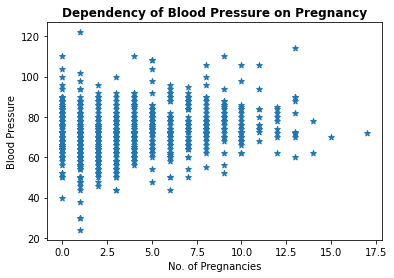

In [31]:
plt.scatter(dt['Pregnancies'],dt['BloodPressure'],marker='*')
plt.title("Dependency of Blood Pressure on Pregnancy",fontweight="bold")
plt.xlabel("No. of Pregnancies")
plt.ylabel("Blood Pressure")

Normaliazng Data using Standard Scaler

In [32]:
X = dt.drop(['Outcome'], axis = 1)
y = dt['Outcome']
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))



# Splitting the data into train and test

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)


# Building model with KNN Algorithm 

Taking random value of k as 10

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Train Model and Predict
k = 10
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)
print("Accuracy of model at K=10 is",metrics.accuracy_score(y_test, Pred_y))


Accuracy of model at K=10 is 0.7792207792207793


To increase Model Accuracy

Maximum accuracy:- 0.7987012987012987 at K = 29


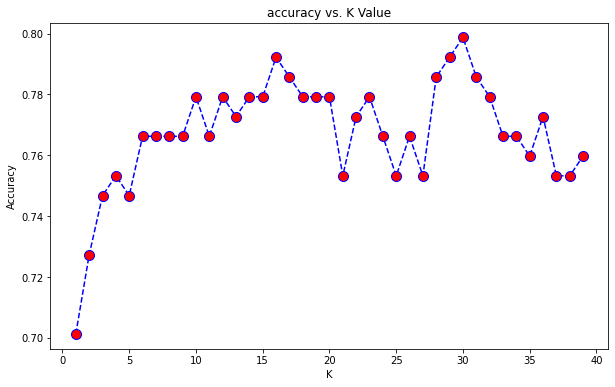

In [35]:
acc = []
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    y_p = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, y_p))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

Now taking k=29(for maximum accuracy).29 is nearly equal to square root of 768 which total no. of observations(or tuples).

In [36]:
#Train Model and Predict
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [37]:
k = 29
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
y_p = neigh.predict(X_test)
print("Accuracy of model at K=29 is",metrics.accuracy_score(y_test,y_p))


Accuracy of model at K=29 is 0.7922077922077922


In [38]:
new_input = [[1,89,67,23,94,28.1,0.167,21]]

In [39]:
new_output = neigh.predict(new_input)
print(new_output)

[1]


# Building model with DecisionTreeClassifier

In [40]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier


In [41]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_p = clf.predict(X_test)

In [42]:
print("Accuracy:",metrics.accuracy_score(y_test, y_p))

Accuracy: 0.6948051948051948


In [43]:
y_p

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1],
      dtype=int64)

 Predicting on new data

In [44]:
new_input = [[1,89,67,23,94,28.1,0.167,21]]


In [45]:
new_output = clf.predict(new_input)

In [46]:
print(new_output)

[0]
